In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/content/train.csv')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [6]:
new_df= df.sample(30000)

In [7]:
new_df.shape

(30000, 6)

In [8]:
# text preprocessing

def preprocess(q):

  q= str(q).lower().strip()

  q= q.replace('$','dollar')
  q= q.replace('%','percent')
  q= q.replace('₹','rupee')
  q= q.replace('€','euro')
  q= q.replace('@','at')

  # math appear around 900 times in dataset
  q= q.replace('[math]','')

  q= q.replace(',000,000,000','b')
  q= q.replace(',000,000','m')
  q= q.replace(',000','k')
  q= re.sub(r'([0-9]+)000000000',r'\1b',q)
  q= re.sub(r'([0-9]+)000000',r'\1m',q)
  q= re.sub(r'([0-9]+)000',r'\1k',q)

  # Source - https://stackoverflow.com/a
  # Posted by arturomp, modified by community. See post 'Timeline' for change history
  # Retrieved 2025-12-04, License - CC BY-SA 3.0

  contractions = {
   "ain't": "am not",
   "aren't": "are not",
   "can't": "cannot",
   "can't've": "cannot have",
   "'cause": "because",
   "could've": "could have",
   "couldn't": "could not",
   "couldn't've": "could not have",
   "didn't": "did not",
   "doesn't": "does not",
   "don't": "do not",
   "hadn't": "had not",
   "hadn't've": "had not have",
   "hasn't": "has not",
   "haven't": "have not",
   "he'd": "he had",
   "he'd've": "he would have",
   "he'll": "he shall",
   "he'll've": "he shall have",
   "he's": "he has",
   "how'd": "how did",
   "how'd'y": "how do you",
   "how'll": "how will",
   "how's": "how has",
   "I'd": "I had",
   "I'd've": "I would have",
   "I'll": "I shall",
   "I'll've": "I shall have",
   "I'm": "I am",
   "I've": "I have",
   "isn't": "is not",
   "it'd": "it had",
   "it'd've": "it would have",
   "it'll": "it shall",
   "it'll've": "it shall have",
   "it's": "it has",
   "let's": "let us",
   "ma'am": "madam",
   "mayn't": "may not",
   "might've": "might have",
   "mightn't": "might not",
   "mightn't've": "might not have",
   "must've": "must have",
   "mustn't": "must not",
   "mustn't've": "must not have",
   "needn't": "need not",
   "needn't've": "need not have",
   "o'clock": "of the clock",
   "oughtn't": "ought not",
   "oughtn't've": "ought not have",
   "shan't": "shall not",
   "sha'n't": "shall not",
   "shan't've": "shall not have",
   "she'd": "she had",
   "she'd've": "she would have",
   "she'll": "she shall",
   "she'll've": "she shall have",
   "she's": "she has",
   "should've": "should have",
   "shouldn't": "should not",
   "shouldn't've": "should not have",
   "so've": "so have",
   "so's": "so as",
   "that'd": "that would",
   "that'd've": "that would have",
   "that's": "that has",
   "there'd": "there had",
   "there'd've": "there would have",
   "there's": "there has",
   "they'd": "they had",
   "they'd've": "they would have",
   "they'll": "they shall",
   "they'll've": "they shall have",
   "they're": "they are",
   "they've": "they have",
   "to've": "to have",
   "wasn't": "was not",
   "we'd": "we had",
   "we'd've": "we would have",
   "we'll": "we will",
   "we'll've": "we will have",
   "we're": "we are",
   "we've": "we have",
   "weren't": "were not",
   "what'll": "what shall",
   "what'll've": "what shall have",
   "what're": "what are",
   "what's": "what has",
   "what've": "what have",
   "when's": "when has",
   "when've": "when have",
   "where'd": "where did",
   "where's": "where has",
   "where've": "where have",
   "who'll": "who shall",
   "who'll've": "who shall have",
   "who's": "who has",
   "who've": "who have",
   "why's": "why has",
   "why've": "why have",
   "will've": "will have",
   "won't": "will not",
   "won't've": "will not have",
   "would've": "would have",
   "wouldn't": "would not",
   "wouldn't've": "would not have",
   "y'all": "you all",
   "y'all'd": "you all would",
   "y'all'd've": "you all would have",
   "y'all're": "you all are",
   "y'all've": "you all have",
   "you'd": "you had",
   "you'd've": "you would have",
   "you'll": "you will",
   "you'll've": "you will have",
   "you're": "you are",
   "you've": "you have"

  }


  q_decontracted=[]
  for word in q.split():
     if word in contractions:
        word= contractions[word]

     q_decontracted.append(word)

  q= ' '.join(q_decontracted)
  q= q.replace("'ve"," have")
  q= q.replace("n't"," not")
  q= q.replace("'re"," are")
  q= q.replace("'ll"," will")

  q= BeautifulSoup(q)
  q= q.get_text()
  pattern= re.compile('\W')
  q= re.sub(pattern,' ',q).strip()

  return q



In [9]:
preprocess("I've already!  wasn't <b>done</b>?")

'i have already  was not done'

In [10]:
new_df['question1']= new_df['question1'].apply(preprocess)
new_df['question2']= new_df['question2'].apply(preprocess)

In [11]:
#feature engineering

new_df['q1_len']= new_df['question1'].str.len()
new_df['q2_len']= new_df['question2'].str.len()

In [12]:
new_df['q1_num_words']= new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']= new_df['question2'].apply(lambda row: len(row.split(" ")))

In [13]:
def common_words(row):
  w1= set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1&w2)

In [14]:
new_df['common_words']= new_df.apply(common_words,axis=1)

In [15]:
def word_total(row):
  w1= set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1)+ len(w2)

In [16]:
new_df['total_words']= new_df.apply(word_total,axis=1)

In [17]:
new_df['word_share']= round(new_df['common_words']/new_df['total_words'],2)

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
154004,154004,241606,4509,which is the best book by colleen hoover,what are your favorite books of all time and why,0,40,49,8,11,0,19,0.00
281079,281079,88042,400792,i want to live the rest of my life alone and w...,could a person really live alone for the rest ...,0,91,59,19,12,6,31,0.19
380114,380114,137092,511701,who are all the actors who played batman in o...,among all the actors who have played batman on...,0,50,84,11,18,7,24,0.29
193067,193067,148676,133599,how do i improve my general knowledge,what can i do to improve my general knowledge,1,37,45,7,9,6,16,0.38
42889,42889,77228,77229,how do i break up with fiancé,is there any way in which i might break up wit...,1,29,79,7,17,4,24,0.17


Implementing Advanced features

In [19]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
def fetch_token_features(row):
  q1= row['question1']
  q2= row['question2']

  SAFE_DIV= 0.0001

  STOP_WORDS= stopwords.words('english')

  token_features= [0.0]*8

  q1_tokens= q1.split()
  q2_tokens= q2.split()

  if(len(q1_tokens)==0 or len(q2_tokens)==0):
    return token_features

  #getting words from questiions
  q1_words= set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words= set([word for word in q2_tokens if word not in STOP_WORDS])

  #Getting stopwords from questions
  q1_stop= set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stop= set([word for word in q2_tokens if word in STOP_WORDS])

  #getting no. of common words
  common_words_count= len(q1_words.intersection(q2_words))

  #getting stopwords count
  common_stop_count= len(q1_stop.intersection(q2_stop))

  #count of common tokens
  common_tokens_count= len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0]= common_words_count/(min(len(q1_words),len(q2_words))+ SAFE_DIV)
  token_features[1]= common_words_count/(max(len(q1_words),len(q2_words))+ SAFE_DIV)
  token_features[2]= common_stop_count/(min(len(q1_stop),len(q2_stop))+ SAFE_DIV)
  token_features[3]= common_stop_count/(max(len(q1_stop),len(q2_stop))+ SAFE_DIV)
  token_features[4]= common_tokens_count/(min(len(q1_tokens),len(q2_tokens))+ SAFE_DIV)
  token_features[5]= common_tokens_count/(min(len(q1_tokens),len(q2_tokens))+ SAFE_DIV)

  token_features[6]= int(q1_tokens[-1]==q2_tokens[-1])
  token_features[7]= int(q1_tokens[0]==q2_tokens[0])

  return token_features


In [21]:
token_features= new_df.apply(fetch_token_features,axis=1)

new_df['cwc_min']= list(map(lambda x: x[0],token_features))
new_df['cwc_max']= list(map(lambda x: x[1],token_features))
new_df['csc_min']= list(map(lambda x: x[2],token_features))
new_df['csc_max']= list(map(lambda x: x[3],token_features))
new_df['ctc_min']= list(map(lambda x: x[4],token_features))
new_df['ctc_max']= list(map(lambda x: x[5],token_features))
new_df['last_word_eq']= list(map(lambda x: x[6],token_features))
new_df['first_word_eq']= list(map(lambda x: x[7],token_features))

In [22]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
154004,154004,241606,4509,which is the best book by colleen hoover,what are your favorite books of all time and why,0,40,49,8,11,...,19,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
281079,281079,88042,400792,i want to live the rest of my life alone and w...,could a person really live alone for the rest ...,0,91,59,19,12,...,31,0.19,0.571420,0.399996,0.399992,0.249997,0.499996,0.499996,0.0,0.0
380114,380114,137092,511701,who are all the actors who played batman in o...,among all the actors who have played batman on...,0,50,84,11,18,...,24,0.29,0.749981,0.499992,0.599988,0.428565,0.599994,0.599994,0.0,0.0
193067,193067,148676,133599,how do i improve my general knowledge,what can i do to improve my general knowledge,1,37,45,7,9,...,16,0.38,0.999967,0.999967,0.749981,0.499992,0.857131,0.857131,1.0,0.0
42889,42889,77228,77229,how do i break up with fiancé,is there any way in which i might break up wit...,1,29,79,7,17,...,24,0.17,0.499975,0.166664,0.599988,0.272725,0.571420,0.571420,0.0,0.0


In [23]:
new_df.shape

(30000, 21)

In [24]:
!pip install distance

In [25]:
import distance

In [26]:
def fetch_length_features(row):

  q1= row['question1']
  q2= row['question2']

  length_features= [0.0]*3

  q1_tokens= q1.split()
  q2_tokens= q2.split()

  if(len(q1_tokens)==0 or len(q2_tokens)==0):
     return length_features

  #absolute length
  length_features[0]= abs(len(q1_tokens)-len(q2_tokens))

  #average length
  length_features[1]= (len(q1_tokens)+len(q2_tokens))/2

  strs= list(distance.lcsubstrings(q1, q2))
  if len(strs)==0:
    length_features[2]=0
  else:
    length_features[2]= len(strs[0])/ (min(len(q1),len(q2)) + 1)

  return length_features

In [27]:
length_features= new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff']= list(map(lambda x: x[0], length_features))
new_df['mean_len']= list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio']= list(map(lambda x: x[2], length_features))

In [28]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
154004,154004,241606,4509,which is the best book by colleen hoover,what are your favorite books of all time and why,0,40,49,8,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,9.0,0.121951
281079,281079,88042,400792,i want to live the rest of my life alone and w...,could a person really live alone for the rest ...,0,91,59,19,12,...,0.399996,0.399992,0.249997,0.499996,0.499996,0.0,0.0,6.0,15.0,0.216667
380114,380114,137092,511701,who are all the actors who played batman in o...,among all the actors who have played batman on...,0,50,84,11,18,...,0.499992,0.599988,0.428565,0.599994,0.599994,0.0,0.0,7.0,13.5,0.392157
193067,193067,148676,133599,how do i improve my general knowledge,what can i do to improve my general knowledge,1,37,45,7,9,...,0.999967,0.749981,0.499992,0.857131,0.857131,1.0,0.0,2.0,8.0,0.763158
42889,42889,77228,77229,how do i break up with fiancé,is there any way in which i might break up wit...,1,29,79,7,17,...,0.166664,0.599988,0.272725,0.571420,0.571420,0.0,0.0,10.0,12.0,0.500000


Implementing fuzzy features

In [29]:
!pip install fuzzywuzzy

In [30]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

  q1= row['question1']
  q2= row['question2']

  fuzzy_features= [0.0]*4

  fuzzy_features[0]= fuzz.QRatio(q1,q2)

  fuzzy_features[1]= fuzz.partial_ratio(q1,q2)

  fuzzy_features[2]= fuzz.token_sort_ratio(q1,q2)

  fuzzy_features[3]= fuzz.token_set_ratio(q1,q2)

  return fuzzy_features

In [31]:
fuzzy_features= new_df.apply(fetch_fuzzy_features,axis=1)

new_df['fuzz_ratio']= list(map( lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio']= list(map( lambda x: x[1], fuzzy_features))
new_df['fuzz_sort_ratio']= list(map( lambda x: x[2], fuzzy_features))
new_df['fuzz_set_ratio']= list(map( lambda x: x[3], fuzzy_features))

In [32]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio
154004,154004,241606,4509,which is the best book by colleen hoover,what are your favorite books of all time and why,0,40,49,8,11,...,0.000000,0.0,0.0,2.0,9.0,0.121951,43,42,32,32
281079,281079,88042,400792,i want to live the rest of my life alone and w...,could a person really live alone for the rest ...,0,91,59,19,12,...,0.499996,0.0,0.0,6.0,15.0,0.216667,36,41,52,63
380114,380114,137092,511701,who are all the actors who played batman in o...,among all the actors who have played batman on...,0,50,84,11,18,...,0.599994,0.0,0.0,7.0,13.5,0.392157,60,76,64,83
193067,193067,148676,133599,how do i improve my general knowledge,what can i do to improve my general knowledge,1,37,45,7,9,...,0.857131,1.0,0.0,2.0,8.0,0.763158,83,89,80,94
42889,42889,77228,77229,how do i break up with fiancé,is there any way in which i might break up wit...,1,29,79,7,17,...,0.571420,0.0,0.0,10.0,12.0,0.500000,41,62,36,70


In [33]:
new_df.shape

(30000, 28)

EDA

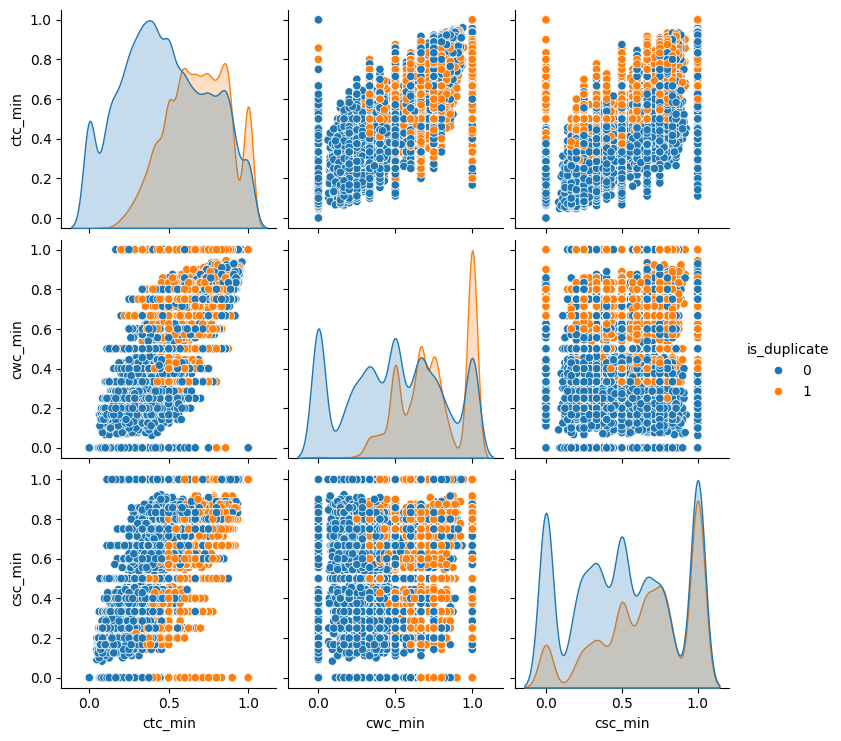

In [33]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

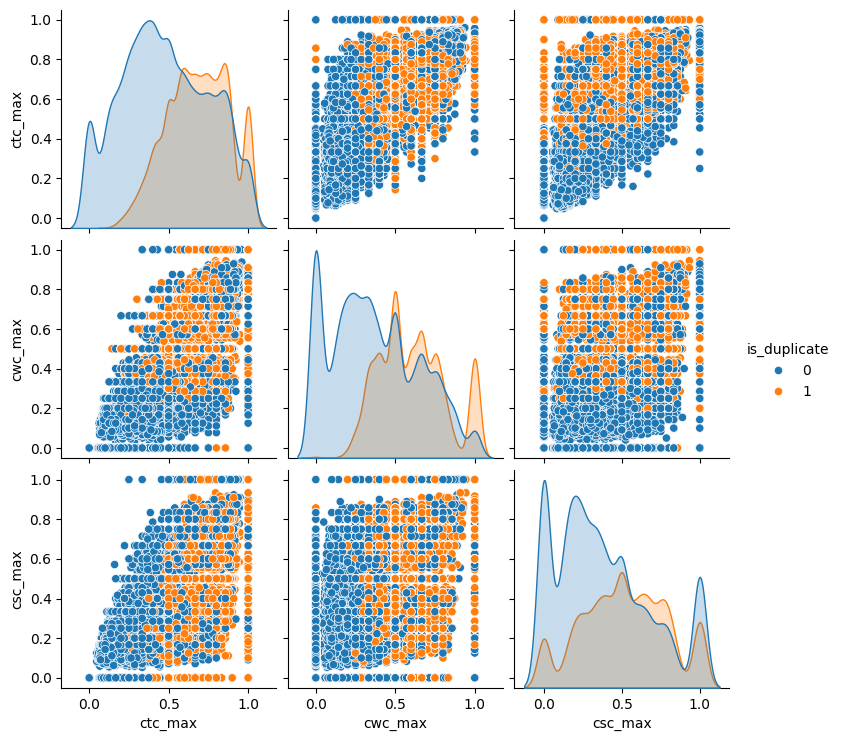

In [34]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

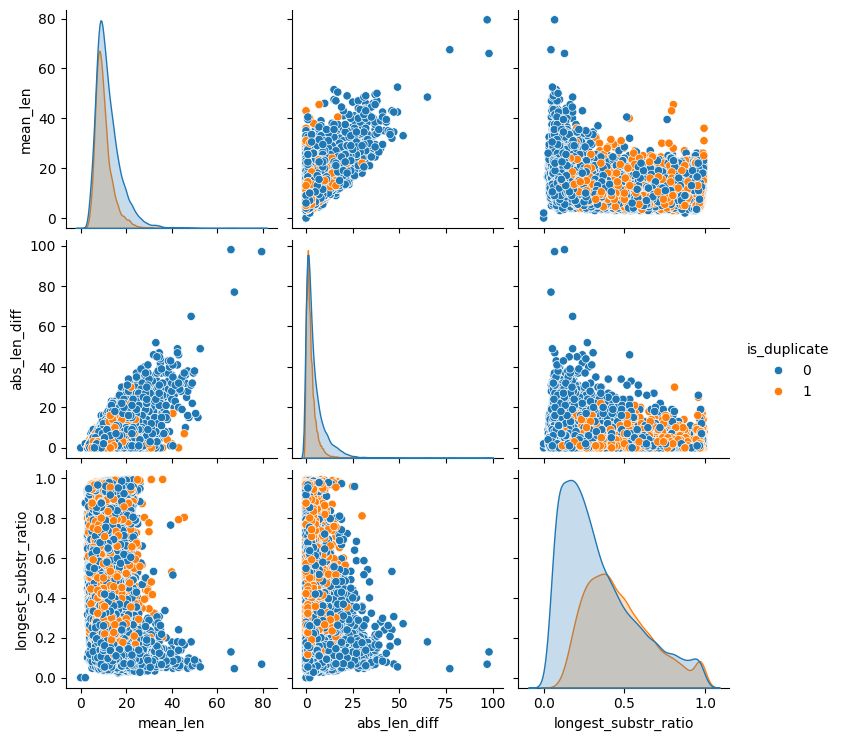

In [35]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

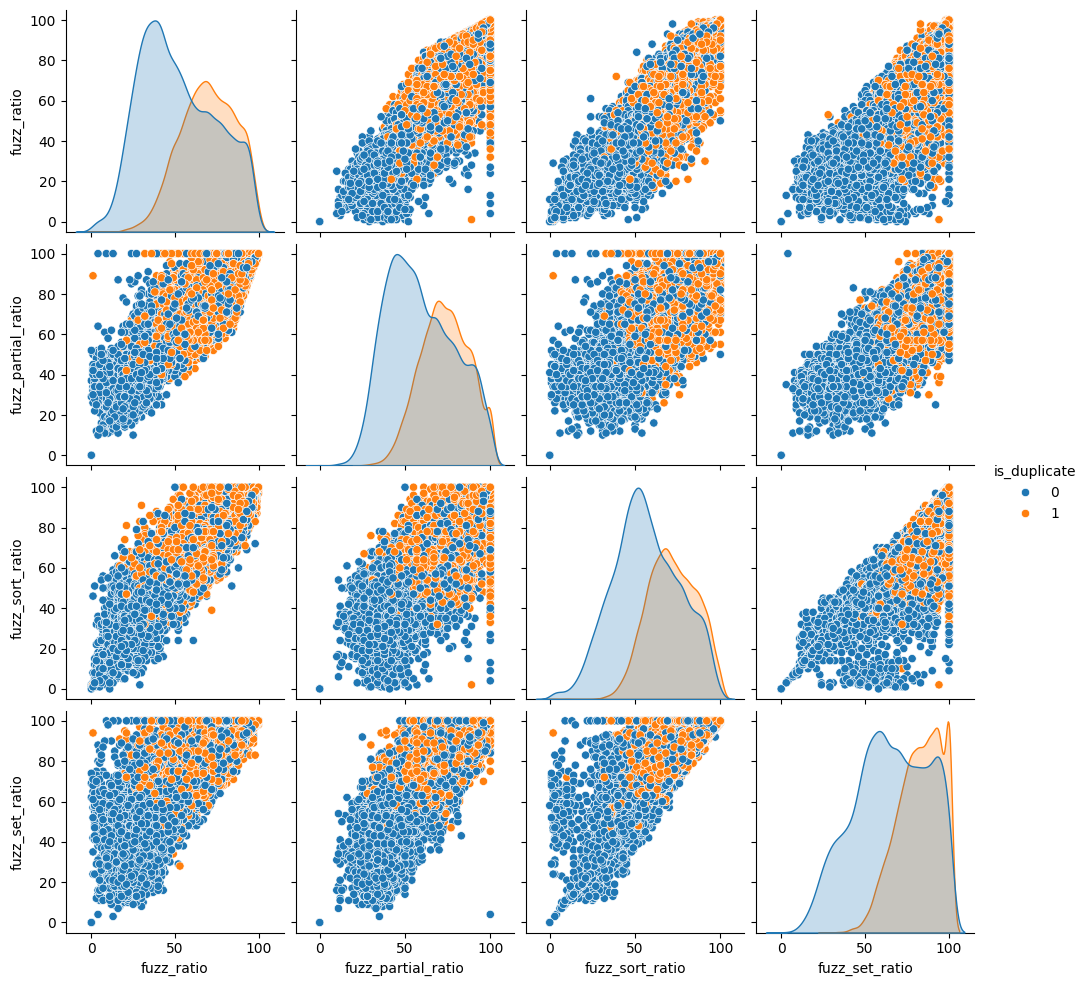

In [36]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','fuzz_sort_ratio','fuzz_set_ratio','is_duplicate']],hue='is_duplicate')

In [34]:
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()

x= ms.fit_transform(new_df[['cwc_min','cwc_max','ctc_min','ctc_max','csc_min','csc_max','last_word_eq','first_word_eq','mean_len','abs_len_diff','longest_substr_ratio','fuzz_ratio','fuzz_partial_ratio','fuzz_sort_ratio','fuzz_set_ratio']])
y= new_df['is_duplicate'].values

In [38]:
from sklearn.manifold import TSNE

tsne2d= TSNE(
    n_components=2,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.071s...
[t-SNE] Computed neighbors for 30000 samples in 7.704s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

KeyboardInterrupt: 

In [ ]:
# draw the plot in appropriate place in the grid
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['s','o'])

In [ ]:
from sklearn.manifold import TSNE

tsne2d= TSNE(
    n_components=3,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(x)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot

import plotly.io as pio
pio.renderers.default = 'colab'

# 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x = tsne2d[:, 0],
    y = tsne2d[:, 1],
    z = tsne2d[:, 2],
    mode = 'markers',
    marker = dict(
        size = 4,
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title='duplicate'),
        opacity = 0.75
    )
)])

fig.update_layout(
    height=800,
    width=800,
    title='3D embedding with engineered features'
)

fig.show()


In [35]:
ques_df= new_df[['question1','question2']]
ques_df.head()

,question1,question2
154004,which is the best book by colleen hoover,what are your favorite books of all time and why
281079,i want to live the rest of my life alone and w...,could a person really live alone for the rest ...
380114,who are all the actors who played batman in o...,among all the actors who have played batman on...
193067,how do i improve my general knowledge,what can i do to improve my general knowledge
42889,how do i break up with fiancé,is there any way in which i might break up wit...


In [36]:
final_df= new_df.drop(columns=['id','qid1','qid2','question1','question2'],axis=1)

In [37]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio
154004,0,40,49,8,11,0,19,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,9.0,0.121951,43,42,32,32
281079,0,91,59,19,12,6,31,0.19,0.571420,0.399996,...,0.499996,0.0,0.0,6.0,15.0,0.216667,36,41,52,63
380114,0,50,84,11,18,7,24,0.29,0.749981,0.499992,...,0.599994,0.0,0.0,7.0,13.5,0.392157,60,76,64,83
193067,1,37,45,7,9,6,16,0.38,0.999967,0.999967,...,0.857131,1.0,0.0,2.0,8.0,0.763158,83,89,80,94
42889,1,29,79,7,17,4,24,0.17,0.499975,0.166664,...,0.571420,0.0,0.0,10.0,12.0,0.500000,41,62,36,70


In [38]:
questions= list(ques_df['question1'])+ list(ques_df['question2'])

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=3000)
q1arry,q2arry= np.vsplit(cv.fit_transform(questions).toarray(),2)

In [40]:
temp_df1= pd.DataFrame(q1arry,index= ques_df.index)
temp_df2= pd.DataFrame(q2arry,index=ques_df.index)
temp_df= pd.concat([temp_df1,temp_df2],axis=1)

In [41]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [42]:
!pip install gensim

In [43]:
import gensim

In [44]:
from gensim.utils import simple_preprocess

In [45]:
question_tokenize=[]
for ques in questions:
  question_tokenize.append(simple_preprocess(ques))

In [46]:
from gensim.models import Word2Vec

In [47]:
model=Word2Vec(
    window=5,
    vector_size=100,
    min_count=2,
    workers=4
)

In [48]:
model.build_vocab(question_tokenize)

In [49]:
model.train(question_tokenize,total_examples=model.corpus_count,epochs= model.epochs)

(2221664, 3144880)

In [50]:
def question_vectors(question,model):
  words= [w for w in question.split() if w in model.wv.key_to_index]

  if len(words)==0:
        return np.zeros(model.vector_size)
  return np.mean([model.wv[w] for w in words], axis=0)

In [51]:
new_df['q1_vec'] = new_df['question1'].apply(lambda questions: question_vectors(questions, model))
new_df['q2_vec'] = new_df['question2'].apply(lambda questions: question_vectors(questions, model))


In [52]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

def cosine_simi(v1,v2):
  return cosine_similarity(v1.reshape(1,-1),v2.reshape(1,-1))[0][0]

In [53]:
#euclidian distance

def euclidian(v1,v2):
  return np.linalg.norm(v1-v2)

In [54]:
#manhatten distance

def manhatten(v1,v2):
  return np.sum(np.abs(v1-v2))

In [55]:
#absolute difference vector

def abs_diff(v1,v2):
  return np.abs(v1-v2)

In [56]:
def features(row):

  v1= row['q1_vec']
  v2= row['q2_vec']
  features=[0.0]*3

  features[0]= cosine_simi(v1,v2)
  features[1]= euclidian(v1,v2)
  features[2]= manhatten(v1,v2)
  return features

In [57]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,q1_vec,q2_vec
154004,154004,241606,4509,which is the best book by colleen hoover,what are your favorite books of all time and why,0,40,49,8,11,...,0.0,2.0,9.0,0.121951,43,42,32,32,"[-0.0969836, 0.0073146755, 0.35667303, 0.13667...","[-0.046593644, 0.3578815, 0.20068952, 0.335793..."
281079,281079,88042,400792,i want to live the rest of my life alone and w...,could a person really live alone for the rest ...,0,91,59,19,12,...,0.0,6.0,15.0,0.216667,36,41,52,63,"[0.29711804, 0.34072053, -0.16148879, -0.04510...","[0.18864109, 0.27196044, -0.05281898, -0.10906..."
380114,380114,137092,511701,who are all the actors who played batman in o...,among all the actors who have played batman on...,0,50,84,11,18,...,0.0,7.0,13.5,0.392157,60,76,64,83,"[-0.42957753, 0.15855153, 0.10899861, 0.141661...","[-0.19085656, 0.23137124, 0.1166498, 0.0330486..."
193067,193067,148676,133599,how do i improve my general knowledge,what can i do to improve my general knowledge,1,37,45,7,9,...,0.0,2.0,8.0,0.763158,83,89,80,94,"[0.4094702, 0.41610345, 0.20202518, -0.2011424...","[0.3234871, 0.3368293, 0.22825603, -0.23199244..."
42889,42889,77228,77229,how do i break up with fiancé,is there any way in which i might break up wit...,1,29,79,7,17,...,0.0,10.0,12.0,0.500000,41,62,36,70,"[0.29454583, 0.33567116, 0.058293927, -0.06894...","[0.052354988, 0.473468, 0.11621323, -0.0551362..."


In [58]:
new_df.shape

(30000, 30)

In [59]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0
q1_len,0
q2_len,0
q1_num_words,0
q2_num_words,0


In [60]:
new_df= new_df.dropna()

In [61]:
word2vec_features= new_df.apply(features,axis=1)

In [62]:
new_df['cosine_similarity']= list(map(lambda x: x[0], word2vec_features))
new_df['euclidian_distance']= list(map(lambda x: x[1], word2vec_features))
new_df['manhatten_distance']= list(map(lambda x: x[2], word2vec_features))

In [79]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,q1_vec,q2_vec,cosine_similarity,euclidian_distance,manhatten_distance
179522,179522,275447,275448,who is your favorite singers,who are your favorite male and female singers,1,28,45,5,8,...,0.517241,71,71,71,94,"[-0.08547216, 0.22589397, -0.19361457, 0.46475...","[-0.27787867, 0.34823152, 0.020936698, 0.48126...",0.873953,2.314698,18.029253
21030,21030,39628,39629,what makes a microprocessor different from a m...,what is the fundamental difference between a m...,1,60,81,8,11,...,0.295082,64,73,75,78,"[-0.39492044, -0.077705555, -0.050843343, 0.20...","[-0.78134924, 0.09007211, -0.40920222, 0.92233...",0.655414,3.063452,23.831537
160369,160369,2035,250138,what are some interesting things to do when bored,what is best do when you feel bored,1,49,35,9,8,...,0.250000,55,62,55,68,"[-0.6892289, 0.3096282, 0.15864836, 0.23280255...","[-0.09642029, 0.012483087, -0.1499899, -0.0456...",0.818200,3.219968,25.292694
202113,202113,304296,52329,how much time jio sim take to activate after o...,how much time does it take for activation of j...,0,71,52,12,11,...,0.264151,54,65,65,67,"[0.2786654, -0.08315723, -0.074238755, -0.3552...","[0.4717103, -0.28801435, -0.011436381, -0.1594...",0.930859,1.623424,13.013483
266122,266122,107508,260490,what has the argument against legalizing prost...,what are some good arguments against legal pro...,1,53,91,7,14,...,0.370370,68,79,65,70,"[-0.5833749, -0.03262388, -0.33081803, 0.52099...","[-0.5236074, 0.32397422, 0.1522711, 0.31593087...",0.597837,3.238502,26.461012


In [63]:
final_df= new_df.drop(columns=['id','qid1','qid2','question1','question2','q1_vec','q2_vec'],axis=1)

In [64]:
final_df= pd.concat([final_df,temp_df],axis=1)
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
154004,0,40,49,8,11,0,19,0.00,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
281079,0,91,59,19,12,6,31,0.19,0.571420,0.399996,...,0,0,0,0,0,0,0,0,0,0
380114,0,50,84,11,18,7,24,0.29,0.749981,0.499992,...,0,0,0,0,0,0,0,0,0,0
193067,1,37,45,7,9,6,16,0.38,0.999967,0.999967,...,0,0,0,0,0,0,0,0,0,0
42889,1,29,79,7,17,4,24,0.17,0.499975,0.166664,...,0,0,0,0,0,0,0,0,0,0


In [65]:
x= final_df.drop(columns='is_duplicate',axis=1)
y= final_df['is_duplicate']

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
from sklearn.metrics import accuracy_score

In [68]:
rf.fit(x_train.values,y_train)
y_pred=rf.predict(x_test.values)
print(accuracy_score(y_pred,y_test))

0.7891666666666667


In [69]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train.values,y_train)
y_pred1=xgb.predict(x_test.values)
print(accuracy_score(y_pred,y_test))

0.7891666666666667


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,y_pred)# rf


array([[3276,  515],
       [ 750, 1459]])

In [72]:
confusion_matrix(y_test,y_pred1) #xgb

array([[3191,  600],
       [ 631, 1578]])

In [73]:
def test_common_words(q1,q2):
  w1= set(map(lambda word: word.lower().strip(), q1.split(" ")))
  w2= set(map(lambda word: word.lower().strip(), q2.split(" ")))
  return len(w1&w2)

In [74]:
def test_word_total(q1,q2):
  w1= set(map(lambda word: word.lower().strip(), q1.split(" ")))
  w2= set(map(lambda word: word.lower().strip(), q2.split(" ")))
  return len(w1)+ len(w2)

In [75]:
def test_fetch_token_features(q1,q2):

  SAFE_DIV= 0.0001

  STOP_WORDS= stopwords.words('english')

  token_features= [0.0]*8

  q1_tokens= q1.split()
  q2_tokens= q2.split()

  if(len(q1_tokens)==0 or len(q2_tokens)==0):
    return token_features

  #getting words from questiions
  q1_words= set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words= set([word for word in q2_tokens if word not in STOP_WORDS])

  #Getting stopwords from questions
  q1_stop= set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stop= set([word for word in q2_tokens if word in STOP_WORDS])

  #getting no. of common words
  common_words_count= len(q1_words.intersection(q2_words))

  #getting stopwords count
  common_stop_count= len(q1_stop.intersection(q2_stop))

  #count of common tokens
  common_tokens_count= len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0]= common_words_count/(min(len(q1_words),len(q2_words))+ SAFE_DIV)
  token_features[1]= common_words_count/(max(len(q1_words),len(q2_words))+ SAFE_DIV)
  token_features[2]= common_stop_count/(min(len(q1_stop),len(q2_stop))+ SAFE_DIV)
  token_features[3]= common_stop_count/(max(len(q1_stop),len(q2_stop))+ SAFE_DIV)
  token_features[4]= common_tokens_count/(min(len(q1_tokens),len(q2_tokens))+ SAFE_DIV)
  token_features[5]= common_tokens_count/(min(len(q1_tokens),len(q2_tokens))+ SAFE_DIV)

  token_features[6]= int(q1_tokens[-1]==q2_tokens[-1])
  token_features[7]= int(q1_tokens[0]==q2_tokens[0])

  return token_features


In [76]:
def test_fetch_length_features(q1,q2):

  length_features= [0.0]*3

  q1_tokens= q1.split()
  q2_tokens= q2.split()

  if(len(q1_tokens)==0 or len(q2_tokens)==0):
     return length_features

  #absolute length
  length_features[0]= abs(len(q1_tokens)-len(q2_tokens))

  #average length
  length_features[1]= (len(q1_tokens)+len(q2_tokens))/2

  strs= list(distance.lcsubstrings(q1, q2))
  length_features[2]= len(strs[0])/ (min(len(q1),len(q2)) + 1)

  return length_features

In [77]:
def test_fetch_fuzzy_features(q1,q2):

  fuzzy_features= [0.0]*4

  fuzzy_features[0]= fuzz.QRatio(q1,q2)

  fuzzy_features[1]= fuzz.partial_ratio(q1,q2)

  fuzzy_features[2]= fuzz.token_sort_ratio(q1,q2)

  fuzzy_features[3]= fuzz.token_set_ratio(q1,q2)

  return fuzzy_features

In [89]:
def test_features(q1,q2):

  v1= (question_vectors(q1,model))
  v2= (question_vectors(q2,model))
  features=[0.0]*3

  features[0]= cosine_simi(v1,v2)
  features[1]= euclidian(v1,v2)
  features[2]= manhatten(v1,v2)
  return features

In [90]:
def query_point_creator(q1,q2):

  input_query=[]

  q1= preprocess(q1)
  q2= preprocess(q2)

  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(len(q1.split(' ')))
  input_query.append(len(q2.split(' ')))

  input_query.append(test_common_words(q1,q2))
  input_query.append(test_word_total(q1,q2))
  input_query.append(round(test_common_words(q1,q2)/test_word_total(q1,q2),2))

  token_features= test_fetch_token_features(q1,q2)
  input_query.extend(token_features)

  length_features= test_fetch_length_features(q1,q2)
  input_query.extend(length_features)

  fuzzy_features= test_fetch_fuzzy_features(q1,q2)
  input_query.extend(fuzzy_features)

  word2vec_features= test_features(q1,q2)
  input_query.extend(word2vec_features)

  q1_bow= cv.transform([q1]).toarray()

  q2_bow= cv.transform([q2]).toarray()

  return np.hstack((np.array(input_query).reshape(1,-1),q1_bow,q2_bow))

In [87]:
q1= "Where is capital of India?"
q2= "What is the concept of democracy?"
q3= "what is idea behind democracy?"
q4= "what is capital of pakistan?"

In [91]:
query_point_creator(q1,q2)

array([[25., 32.,  5., ...,  0.,  0.,  0.]])

In [92]:
query_point_creator(q1,q2).shape

(1, 6025)

In [107]:
rf.predict(query_point_creator(q2,q3))

array([0])

In [ ]:
cv

In [ ]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))